# GRIP - Business Analytics Internship Task #1

# **Predictions using supervised ML**

# Author: Yash Chiddarwar

**Step 1: Import all the required libraries in our file.**

In [19]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import sklearn
%matplotlib inline

**Step 2: Import the data from the URL, check for null values, structure and properties of the dataframe.**

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print(f"Shape of the dataframe: {student_data.shape}")
print(f"Columns of the dataframe: {student_data.columns}")
student_data.info()

Shape of the dataframe: (25, 2)
Columns of the dataframe: Index(['Hours', 'Scores'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Describe the data inside the dataframe which includes the minimum value, maximum value, no. of values, mean and standard deviation of the data set provided.**

In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
student_data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


**Step 3: Create visualization on the given dataset using matplotlib.**

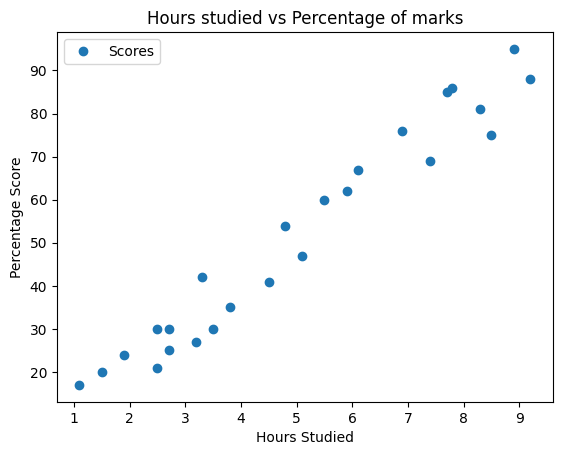

In [6]:
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours studied vs Percentage of marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Observations:

As we can see there is a steady increase of marks when the number of hourse for which the students study increases. We can now create a linear regression on the graph pbtained above.

**Step 4: Preparing the data by dividing it into attributes(inputs) and labels(outputs) and split the data into training and test sets using scikit learn.**

In [7]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

**Step 5: Training the algorithm and plotting the regression line.**

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


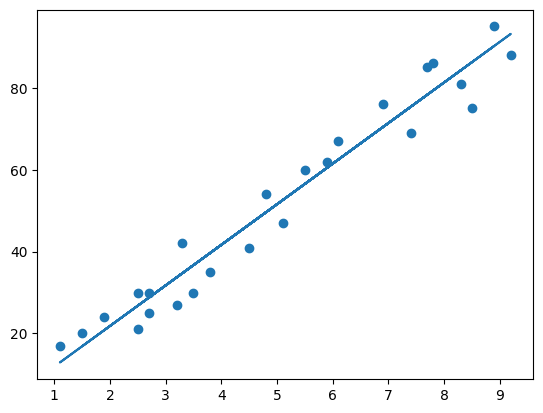

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Step 6: Now use the trained algorithm to make predictions

# Making Predictions

We have trained our algorithm with test data and now we can use the algorithm to make some predictions.

In [10]:
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be predicted for score for 9.25 hours?

In [17]:
input_hours = np.array(9.25)
input_hours = input_hours.reshape(-1, 1)
pred = regressor.predict(input_hours)
print("No. of Hours Studied = {}".format(input_hours[0][0]))
print("Predicted Score = {}".format(pred[0]))

No. of Hours Studied = 9.25
Predicted Score = 93.69173248737535


Therefore we have successfully predicted the score for a student who has studied for 9.25 hours, i.e. **93.69173248737535**.

# Final Step: Evaluate the model

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
